# PR1: Predict the price of the uber ride from a given pickup point to the agreed drop-off location


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Step 1: Import the data

In [2]:
data = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Programming/College/ML/uber.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Q1 :

In [4]:
data.shape

(200000, 9)

In [5]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
data.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


# Step 2 : Clean, Prepare and Manipulate the data

In [7]:
data.drop(columns=["Unnamed: 0", "key"], inplace=True)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
data['dropoff_latitude'].fillna(value=data['dropoff_latitude'].mean(),inplace = True)
data['dropoff_longitude'].fillna(value=data['dropoff_longitude'].median(),inplace = True)

In [10]:
data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Here pickup_datetime is as object where as it should be in datetime format so we'll change it.

In [14]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)

In [13]:
data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

we will extract time feature from the 'pickup_datetime' 
we will add a variable which measures the distance between pickup and drop

In [15]:
data = data.assign(hour = data.pickup_datetime.dt.hour,
                    day = data.pickup_datetime.dt.day,
                    month = data.pickup_datetime.dt.month,
                    year = data.pickup_datetime.dt.year,
                    dayofweek = data.pickup_datetime.dt.dayofweek)

In [58]:
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


Now since we have detailed date time we'll remove date time column

In [16]:
data = data.drop(['pickup_datetime'], axis =1)

In [17]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


We'll write a function to calculate travel distance from longitudes to latitudes

In [18]:
# function to calculate the travel distance from the longitudes and latitudes
from math import *
    
def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
        
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
        
        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371 
        travel_dist.append(c)
            
    return  travel_dist

In [19]:
data['dist_travel_km'] = distance_formula(data.pickup_longitude.to_numpy(), data.pickup_latitude.to_numpy(), data.dropoff_longitude.to_numpy(), data.dropoff_latitude.to_numpy())

Q2 :

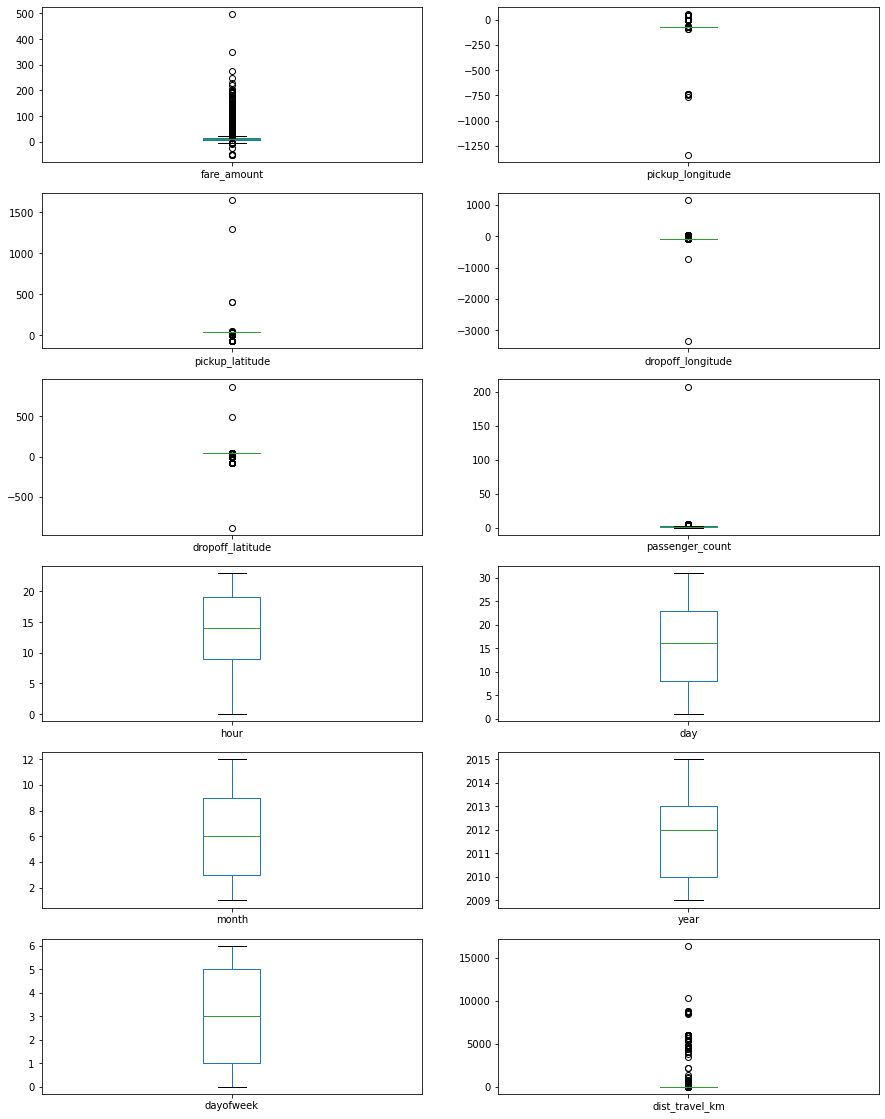

In [20]:
data.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [21]:
#Using the InterQuartile Range to fill the values
def remove_outlier(data1 , col):
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    data[col] = np.clip(data1[col] , lower_whisker , upper_whisker)
    return data1

def treat_outliers_all(data1 , col_list):
    for c in col_list:
        data1 = remove_outlier(data , c)
    return data1

In [22]:
data = treat_outlier_all(data, data.columns)


NameError: name 'treat_outlier_all' is not defined

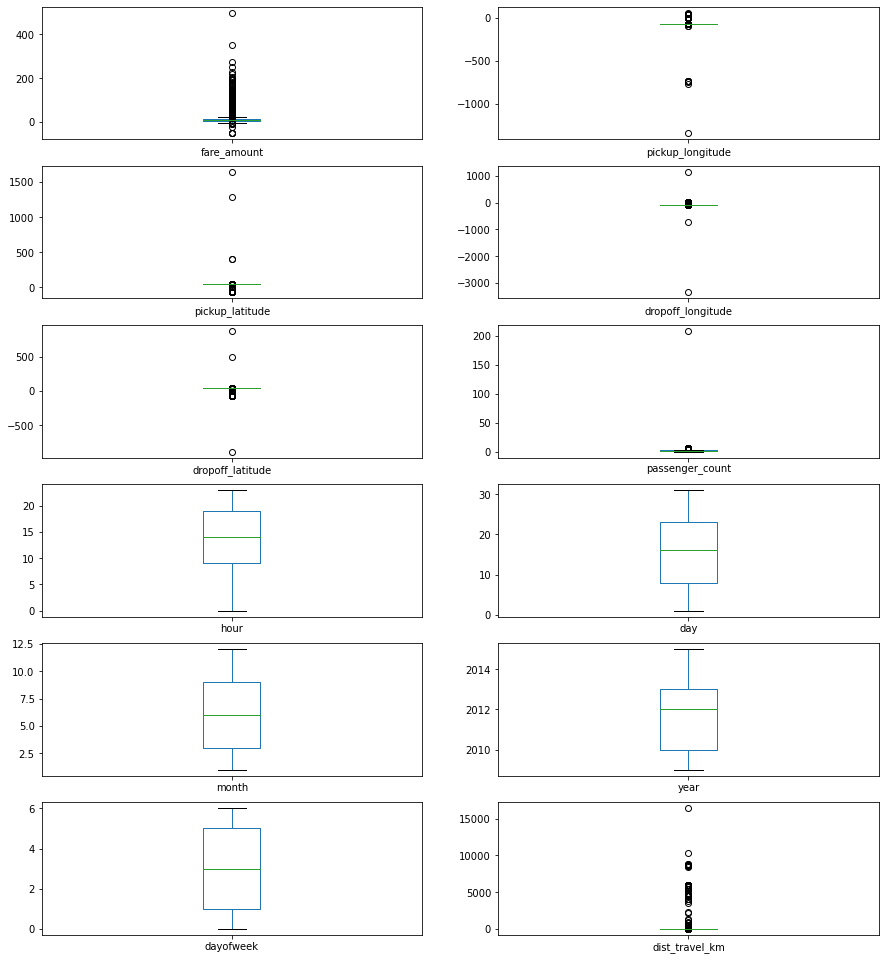

In [23]:
data.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 
plt.show()

Q3

In [24]:
corr = data.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.010457,-0.008481,0.008985,-0.011014,0.010150,-0.021473,0.001374,0.023814,0.118335,0.007501,0.024685
pickup_longitude,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414,0.002433,0.005184,-0.004665,0.009966,0.000825,0.105581
pickup_latitude,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560,-0.003822,-0.008264,0.004625,-0.010233,-0.002455,-0.062436
dropoff_longitude,0.008985,0.833026,-0.774787,1.000000,-0.917010,0.000034,0.003478,0.005056,-0.003606,0.008467,0.000002,0.056717
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.002544,-0.007835,0.003818,-0.011239,-0.002335,-0.079944
passenger_count,0.010150,-0.000414,-0.001560,0.000034,-0.000659,1.000000,0.013196,0.003252,0.009773,0.004798,0.033196,-0.001473
hour,-0.021473,0.002433,-0.003822,0.003478,-0.002544,0.013196,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.000640
day,0.001374,0.005184,-0.008264,0.005056,-0.007835,0.003252,0.004677,1.000000,-0.017360,-0.012170,0.005617,-0.002115
month,0.023814,-0.004665,0.004625,-0.003606,0.003818,0.009773,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,-0.000633
year,0.118335,0.009966,-0.010233,0.008467,-0.011239,0.004798,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.026378


<AxesSubplot:>

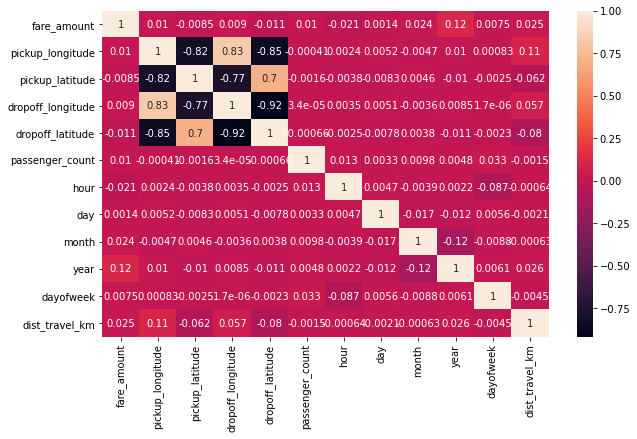

In [25]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(data.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

Q4

In [26]:
# Dividing the dataset into feature and target values 
data_x = data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
data_y = data['fare_amount']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

In [28]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2,3.539715


In [29]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred_lin = reg.predict(x_test)
print(y_pred_lin)

[13.07457776 10.57270456 12.55227842 ... 12.25770545 11.33646643
 12.01725744]


In [32]:
from sklearn.ensemble import RandomForestRegressor

#Here n_estimators means number of trees you want to build before making the prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
y_pred_rf = rf.predict(x_test)
print(y_pred_rf)

[ 5.005  6.853  9.24  ... 10.95  11.881 13.211]


Q5.

In [34]:
cols = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

In [35]:
from sklearn import metrics 
from sklearn.metrics import r2_score 

reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
reg_squared = r2_score(y_test, y_pred_lin)

full_metrics = pd.Series({'Model': "Linear Regression", 'RMSE' : reg_RMSE, 'R-Squared' : reg_squared})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared
0,Linear Regression,9.768932,0.015458


In [36]:
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
rf_squared = r2_score(y_test, y_pred_rf)


full_metrics = pd.Series({'Model': "Random Forest ", 'RMSE':rf_RMSE, 'R-Squared': rf_squared})
# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared
0,Linear Regression,9.768932,0.015458
1,Random Forest,4.341775,0.805520
